In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection as model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

In [2]:
df = pd.read_excel("data.xlsx")
df.head()

,NUM_DATA_TOPUPS_Mean,NUM_OF_EXTENSIONS_Mean,NUM_DAYS_TO_EOB_Mean,NUM_MONTH_SUB_Mean,CORE_COMMITMENT_Mean,POT_VOLUME_GIGABYTE_Mean,NUM_WARN_80PCT_3M_Mean,NUM_WARN_80PCT_2M_Mean,NUM_WARN_80PCT_1M_Mean,NUM_WARN_100PCT_3M_Mean,...,KUNDSERVICEVTG,ONLINEMEDIA,REKRYTERAR,NYAPATENT,TILLVAXT,FORDON10,HEMSIDA,TARGET,CUSTOMER_ID,Unnamed: 50
0,0,0,0,34,119,0,0,0,0,0,...,0,1,1,0,1,1,1,0,1957,NaN
1,0,0,0,48,79,0,0,0,0,0,...,0,1,1,0,1,1,1,0,12088,NaN
2,0,0,0,36,224,1,0,0,0,0,...,0,1,0,0,0,1,1,0,4383,NaN
3,0,0,0,53,119,0,0,0,0,0,...,0,1,0,0,0,1,1,0,94721,NaN
4,0,0,0,188,399,5,0,0,0,0,...,0,1,0,0,0,1,0,0,76598,NaN


In [3]:
df.shape

(53217, 51)

In [4]:
df.drop(df.columns[29], axis=1, inplace=True)

In [5]:
# checking the unique values of the target variable
df.TARGET.unique()

array([0, 1], dtype=int64)

In [6]:
df = df[df["N_SUBSCRIPTIONS_NOW"] >= 1]
df.shape

(48984, 50)

In [7]:
df = df[df["TELENOR_SEGMENT"].isin(['OFFEN', 'SERVI', 'UTEP', 'TILLV', 'HUVUD', 'PROFE', '$null$','NO_VA'])]

In [8]:
df["TELENOR_SEGMENT"].unique()

array(['OFFEN', 'SERVI', 'UTEP', 'TILLV', 'HUVUD', 'PROFE', '$null$',
       'NO_VA'], dtype=object)

## seperating numerical and categorical columns

In [9]:
cols = df.columns

num_cols = df._get_numeric_data().columns
num_cols = num_cols.append(pd.Index(['TELIA', 'ARPU12_Mean', 'ARPU12_Sum'])) 
cat_cols= list(set(cols) - set(num_cols))

In [10]:
cat_cols

['MAIN_INDUSTRY_GROUP_NAME',
 'TELENOR_SEGMENT',
 'B1',
 'B2',
 'AGREEMENT_GROUP',
 'BREDBANDSBOLAGET_CUSTOMER',
 'SEGMENT',
 'JURIDICAL_FORM']

In [16]:
num_cols

Index(['NUM_DATA_TOPUPS_Mean', 'NUM_OF_EXTENSIONS_Mean',
       'NUM_DAYS_TO_EOB_Mean', 'NUM_MONTH_SUB_Mean', 'CORE_COMMITMENT_Mean',
       'POT_VOLUME_GIGABYTE_Mean', 'NUM_WARN_80PCT_3M_Mean',
       'NUM_WARN_80PCT_2M_Mean', 'NUM_WARN_80PCT_1M_Mean',
       'NUM_WARN_100PCT_3M_Mean', 'NUM_WARN_100PCT_2M_Mean',
       'NUM_WARN_100PCT_1M_Mean', 'N_SUBSCRIPTIONS_HIST',
       'N_SUBSCRIPTIONS_NOW', 'ENGAGEMANG', 'SCORING_TOTAL', 'NUM_VOICE_SME',
       'NUM_FMM_TELEPHONY', 'NUM_FMM_BROADBAND', 'CONSUMER', 'NUM_MONTH_CUST',
       'TELAVOX', 'HI3G', 'TELE2', 'OFFICE365', 'GMAIL', 'AMAZON', 'AZURE',
       'MARKETAUTOMATION', 'KUNDSERVICEVTG', 'ONLINEMEDIA', 'REKRYTERAR',
       'NYAPATENT', 'TILLVAXT', 'FORDON10', 'HEMSIDA', 'TARGET', 'CUSTOMER_ID',
       'Unnamed: 50', 'TELIA', 'ARPU12_Mean', 'ARPU12_Sum'],
      dtype='object')

In [17]:
df_num = df[num_cols]
df_cat = df[cat_cols]

In [18]:
# df_num.describe()

In [19]:
df_num['TARGET'].value_counts()

0    48127
1      823
Name: TARGET, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C88E2B400>,
      dtype=object)

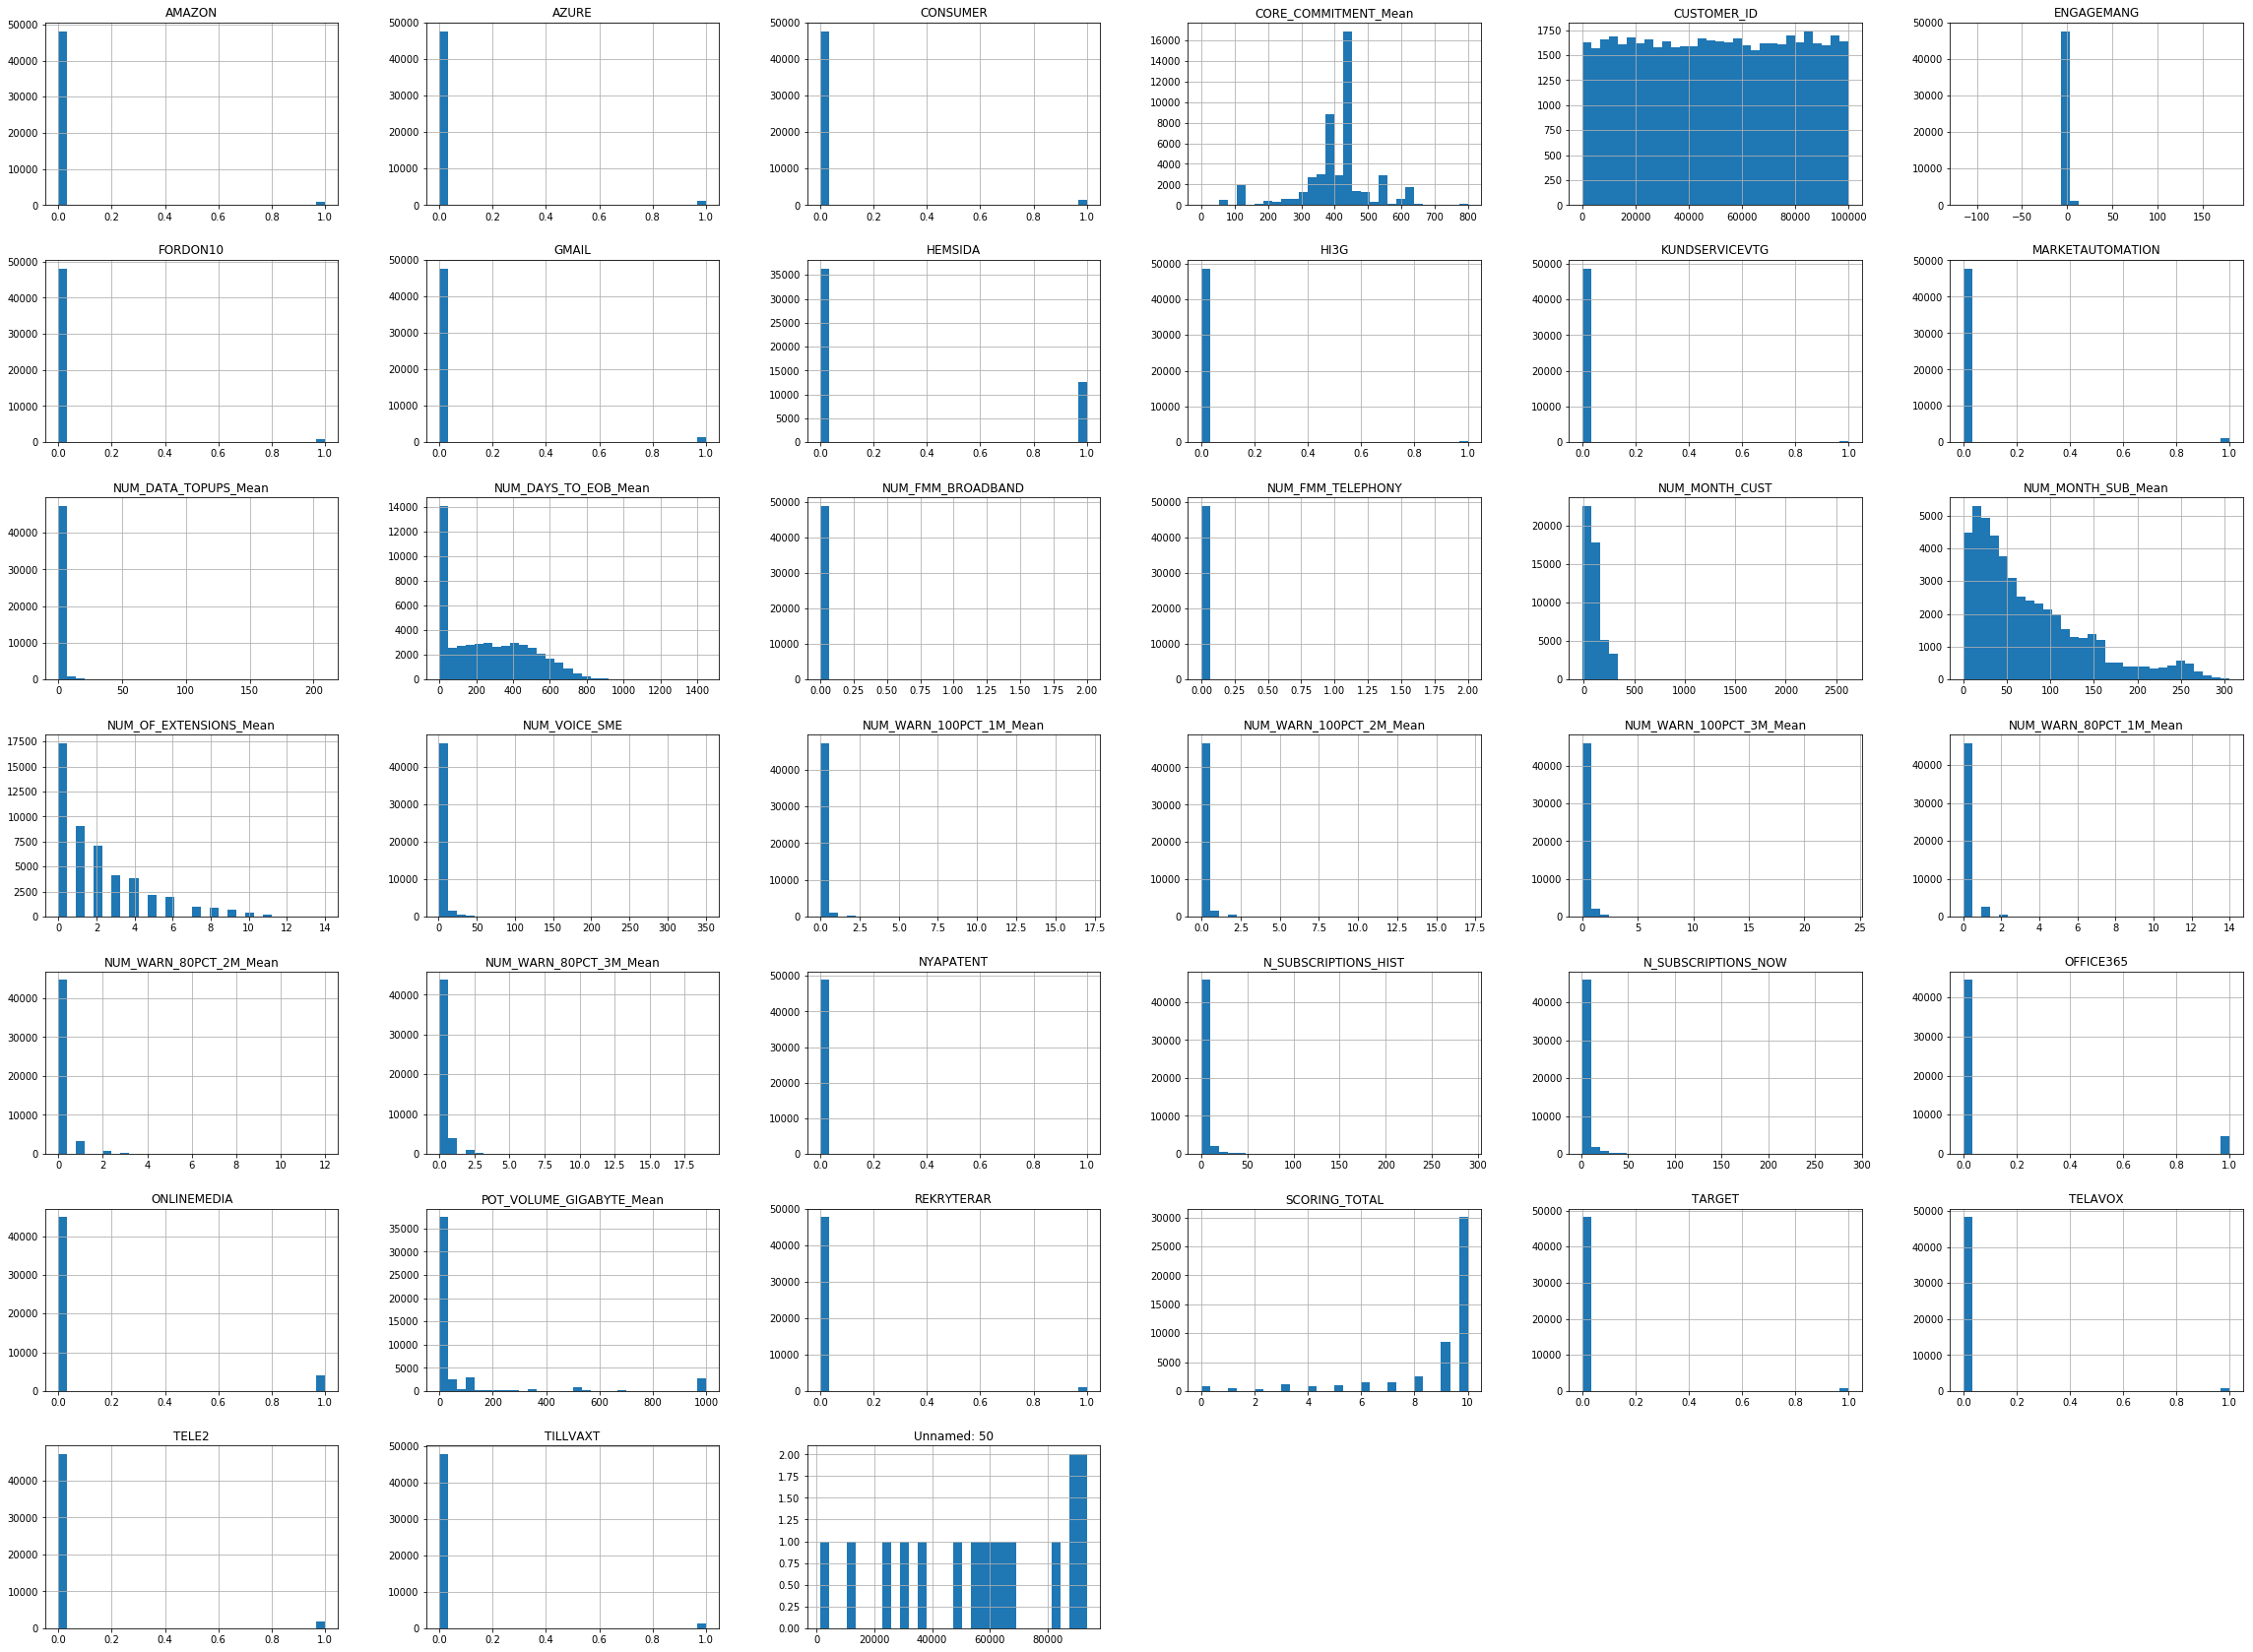

In [20]:
df_num.hist(bins=30, figsize=(40, 30))

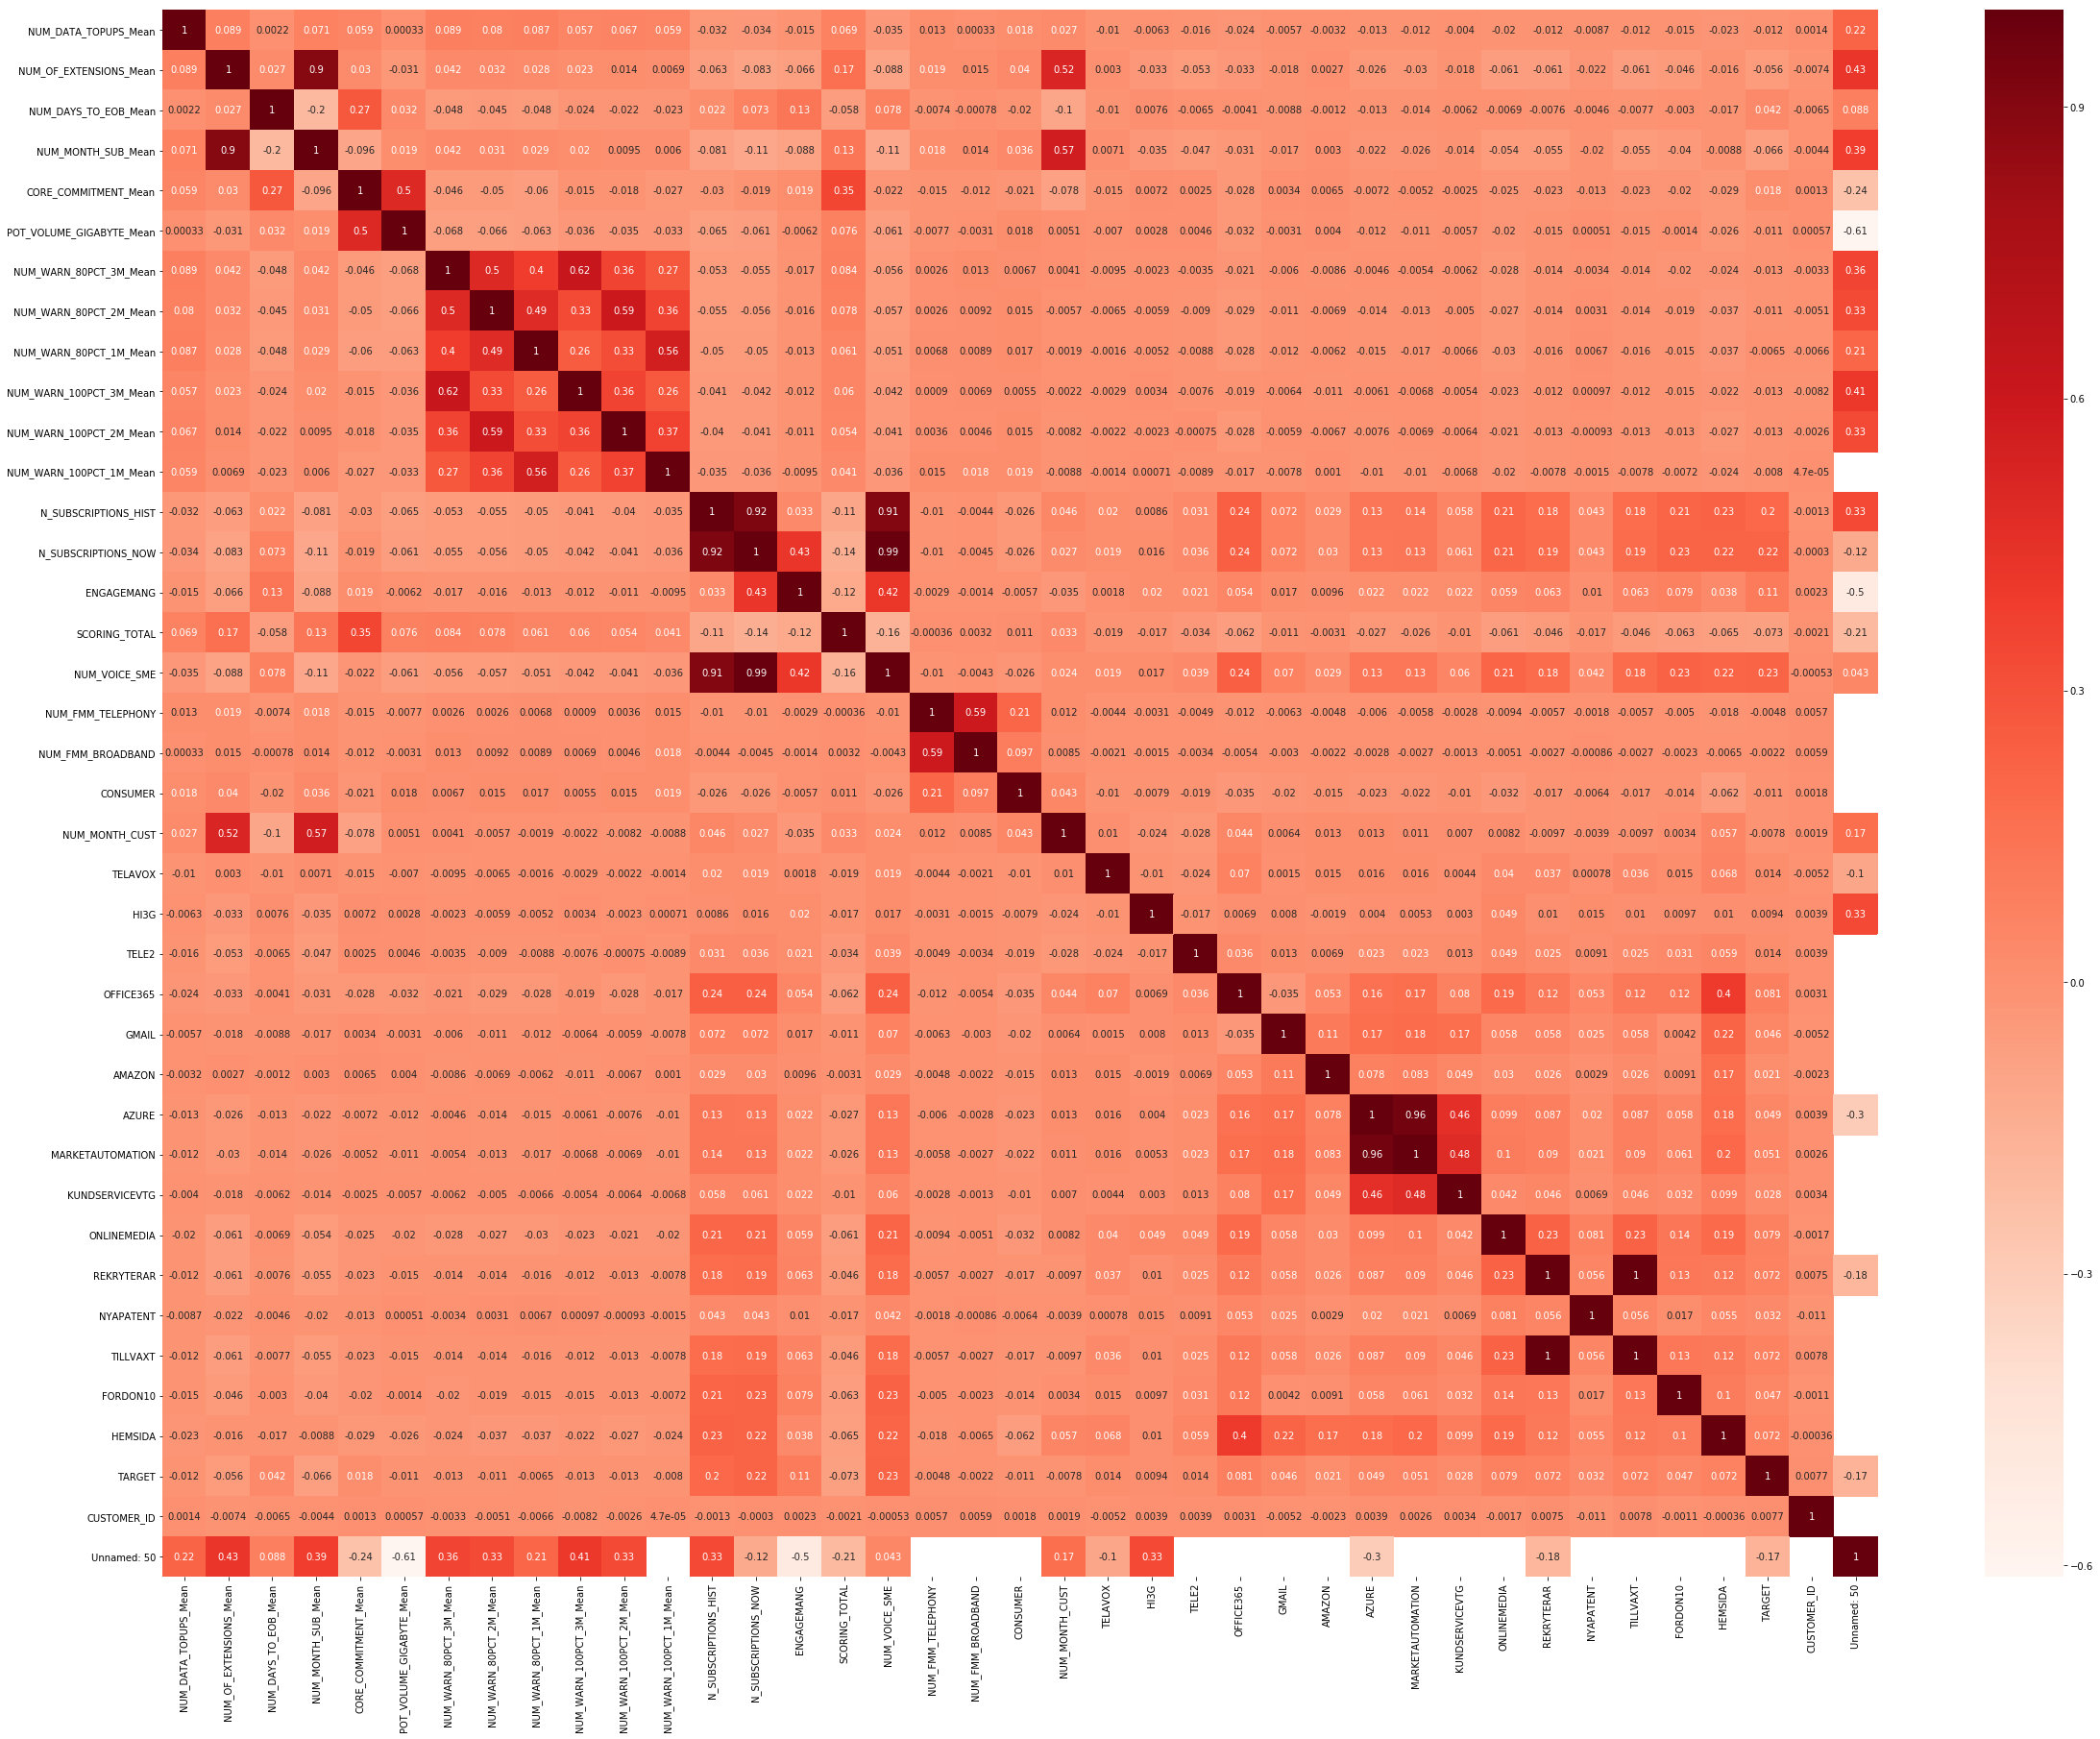

In [21]:
## Use a heatmap to see which features have strongest correlation with target
#correlation matrix
#Using Pearson Correlation

plt.figure(figsize=(40,30))
cor = df_num.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [22]:
#Correlation with output variable
cor_target = abs(cor["TARGET"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

NUM_OF_EXTENSIONS_Mean    0.056015
NUM_MONTH_SUB_Mean        0.066062
N_SUBSCRIPTIONS_HIST      0.197332
N_SUBSCRIPTIONS_NOW       0.222528
ENGAGEMANG                0.110808
SCORING_TOTAL             0.072593
NUM_VOICE_SME             0.225559
OFFICE365                 0.081029
MARKETAUTOMATION          0.050813
ONLINEMEDIA               0.078893
REKRYTERAR                0.072072
TILLVAXT                  0.072120
HEMSIDA                   0.071984
TARGET                    1.000000
Unnamed: 50               0.166449
Name: TARGET, dtype: float64

In [23]:
## choosing the relevant features from num_cols

df_relv_new = df[relevant_features.keys()]

In [24]:
df_relv_new.shape

(48950, 15)

In [25]:
# instantiate label encoder object
le = LabelEncoder()

# apply le on categorical feature columns
df_cat = df_cat.apply(lambda col: le.fit_transform(col))

In [26]:
df_cat.shape

(48950, 8)

In [27]:
final_df = df_relv_new.append(df_cat)

C:\Users\Prady\Anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [28]:
final_df.shape

(97900, 23)

In [29]:
final_df = final_df.fillna(0)

In [30]:
X= final_df.loc[:, final_df.columns != 'TARGET']
y=final_df['TARGET']

In [31]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=2)

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(65593, 22)
(65593,)
(32307, 22)
(32307,)


In [50]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    XGBClassifier()
    ]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
    
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, y_train, scoring='recall', cv=CV)
    
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'recall_score'])

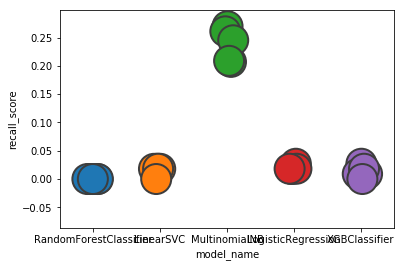

In [56]:
sns.stripplot(x='model_name', y='recall_score', data=cv_df,size=30, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [58]:
cv_df.groupby('model_name').recall_score.mean()

model_name
LinearSVC                 0.014447
LogisticRegression        0.019885
MultinomialNB             0.238657
RandomForestClassifier    0.000000
XGBClassifier             0.012645
Name: recall_score, dtype: float64

In [61]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    XGBClassifier()
    ]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
    
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, y_train, scoring='f1', cv=CV)
    
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'f1_score'])

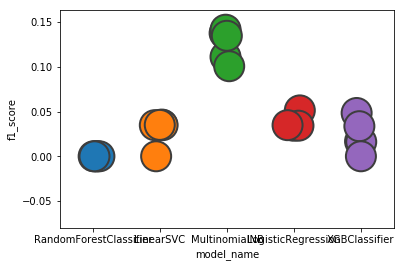

In [62]:
sns.stripplot(x='model_name', y='f1_score', data=cv_df,size=30, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [63]:
cv_df.groupby('model_name').f1_score.mean()

model_name
LinearSVC                 0.028010
LogisticRegression        0.037845
MultinomialNB             0.125102
RandomForestClassifier    0.000000
XGBClassifier             0.022959
Name: f1_score, dtype: float64

## Model Evaluation

Continue with our best model MultinomialNB(), we are going to look at the confusion matrix, and show the discrepancies between predicted and actual labels.

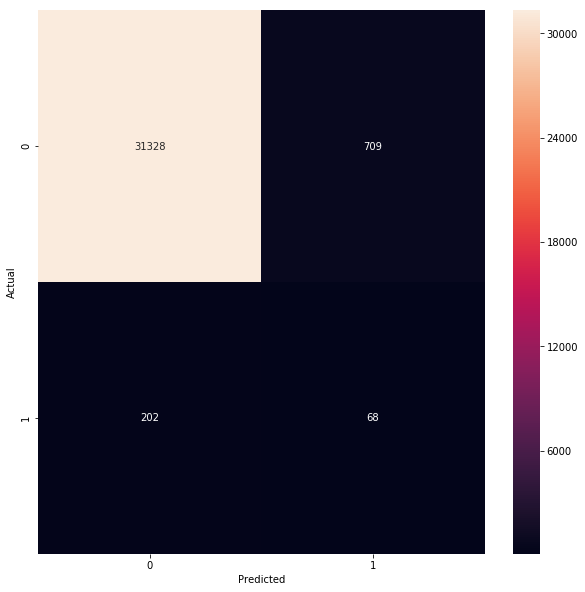

In [64]:
model = MultinomialNB()

X_train, X_test, y_train, y_test, indices_train, indices_test = model_selection.train_test_split(X, y, final_df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

- **Precision/Specificity**: how many selected instances are relevant.
- **Recall/Sensitivity**: how many relevant instances are selected.
- **F1 score**: harmonic mean of precision and recall.

In [65]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     32037
         1.0       0.09      0.25      0.13       270

    accuracy                           0.97     32307
   macro avg       0.54      0.61      0.56     32307
weighted avg       0.99      0.97      0.98     32307



## Things to note :

1. As we can see below the classes 0 and 1 in the TARGET variable is imbalanced by a big amount->  97077:823- imbalanced classes causes inaccurate results hence it can be balanced using sampling methods like Tomek Links and Smote.

In [66]:
final_df['TARGET'].value_counts()

0.0    97077
1.0      823
Name: TARGET, dtype: int64

## Using SMOTE

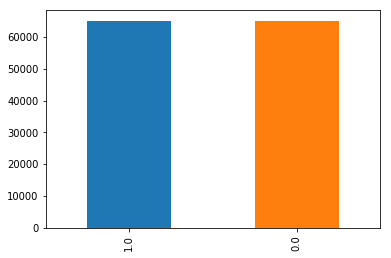

In [67]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())

# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

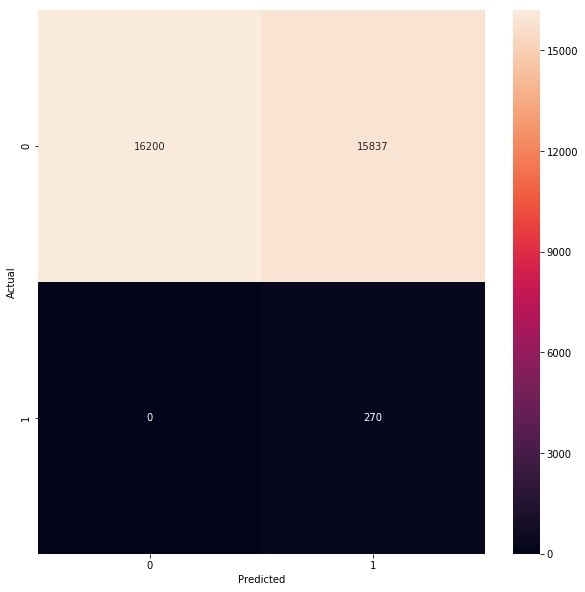

In [68]:
model.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = model.predict(X_train_new)

# prediction for Testing data
test_pred_sm = model.predict(X_test)

conf_mat = confusion_matrix(y_test, test_pred_sm)
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [69]:
from sklearn import metrics
print(metrics.classification_report(y_test, test_pred_sm))

              precision    recall  f1-score   support

         0.0       1.00      0.51      0.67     32037
         1.0       0.02      1.00      0.03       270

    accuracy                           0.51     32307
   macro avg       0.51      0.75      0.35     32307
weighted avg       0.99      0.51      0.67     32307



## trying out with XGBoost

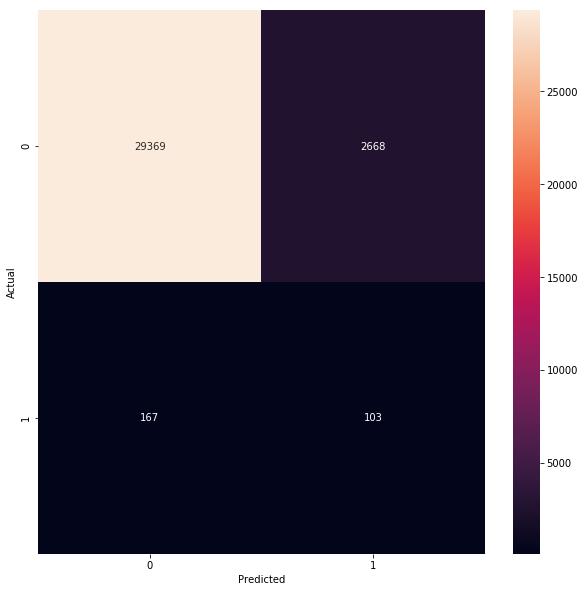

In [43]:
model = XGBClassifier(scale_pos_weight=117.9)

X_train, X_test, y_train, y_test, indices_train, indices_test = model_selection.train_test_split(X, y, final_df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [44]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95     32037
         1.0       0.04      0.38      0.07       270

    accuracy                           0.91     32307
   macro avg       0.52      0.65      0.51     32307
weighted avg       0.99      0.91      0.95     32307



## Using SMOTE in XGBoost

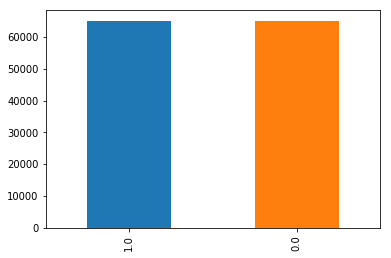

In [45]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())

# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

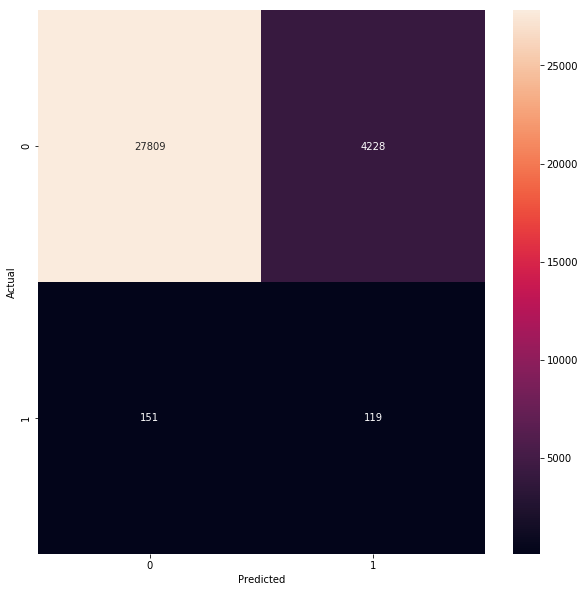

In [46]:
model.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = model.predict(X_train_new)

# prediction for Testing data
test_pred_sm = model.predict(X_test)

# print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
# print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

conf_mat = confusion_matrix(y_test, test_pred_sm)
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [47]:
from sklearn import metrics
print(metrics.classification_report(y_test, test_pred_sm))

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93     32037
         1.0       0.03      0.44      0.05       270

    accuracy                           0.86     32307
   macro avg       0.51      0.65      0.49     32307
weighted avg       0.99      0.86      0.92     32307

